In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

In [2]:
df3 = pd.read_csv("../data/rebecca/drug_scores_rf_cds3.txt", sep='\t', low_memory=False, index_col=0)
df4 = pd.read_csv("../data/rebecca/drug_scores_rf_cds4.txt", sep='\t', low_memory=False, index_col=0)

df = pd.concat([df3, df4], axis=1)

In [3]:
ic50 = pd.read_csv("../data/DrugResponse_PANCANCER_GDSC1_GDSC2_IC_20191119.csv")

In [65]:
def plot_best_params(df):
    fig, ax = plt.subplots((df.columns.size - 2) // 2 + 1,
                           2,
                           figsize=(15, 4 * ((df.columns.size - 2) // 2 + 1)))
    count = 0
    for col in df.columns:
        if col != 'Drug Id':
            if (df.columns.size - 1) <= 2:
                sns.countplot(df[col], ax=ax[count])
            else:
                sns.countplot(df[col], ax=ax[count // 2, count % 2])
            count += 1

# RF

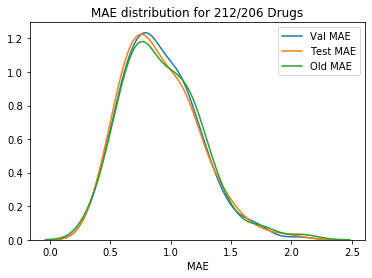

In [91]:
scores_rf = pd.read_csv("../work_dirs/RandomForest/scores_202003070311.csv")
df_overlap = df[ic50[ic50['Drug Id'].isin(scores_rf['Drug Id'])]['Drug name'].unique()]

sns.distplot(scores_rf['val_mae'], hist=False, label='Val MAE')
sns.distplot(scores_rf['test_mae'], hist=False, label='Test MAE')
sns.distplot(df_overlap.iloc[0,:].astype(float), hist=False, label='Old MAE')
plt.legend()
plt.title('MAE distribution for 212/206 Drugs')
plt.xlabel("MAE")
plt.show()

In [92]:
print(scores_rf['val_mae'].mean())
print(scores_rf['test_mae'].mean())
print(df_overlap.iloc[0,:].astype(float).mean())

0.9120296529167659
0.9093959827040009
0.9252397546753948


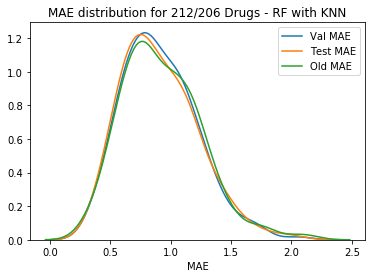

In [93]:
scores_rf_knn = pd.read_csv("../work_dirs/RandomForest/scores_202003071140.csv")
df_overlap = df[ic50[ic50['Drug Id'].isin(scores_rf_knn['Drug Id'])]['Drug name'].unique()]

sns.distplot(scores_rf_knn['val_mae'], hist=False, label='Val MAE')
sns.distplot(scores_rf_knn['test_mae'], hist=False, label='Test MAE')
sns.distplot(df_overlap.iloc[0,:].astype(float), hist=False, label='Old MAE')
plt.legend()
plt.title('MAE distribution for 212/206 Drugs - RF with KNN')
plt.xlabel("MAE")
plt.show()

In [68]:
print(scores_rf_knn['val_mae'].mean())
print(scores_rf_knn['test_mae'].mean())
print(df_overlap.iloc[0,:].astype(float).mean())

0.9090214940035409
0.9068694139632776
0.9252397546753948


In [70]:
print(ttest_ind(scores_rf_knn['val_mae'], scores_rf['val_mae']))
print(ttest_ind(scores_rf_knn['test_mae'], scores_rf['test_mae']))

Ttest_indResult(statistic=-0.10106955910456611, pvalue=0.9195432439729275)
Ttest_indResult(statistic=-0.08281595490788768, pvalue=0.9340371498340112)


# svm

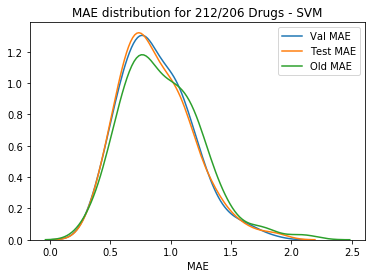

In [89]:
scores_svm = pd.read_csv("../work_dirs/protein/SVM/scores_202003101516.csv")
df_overlap = df[ic50[ic50['Drug Id'].isin(scores_svm['Drug Id'])]['Drug name'].unique()]

sns.distplot(scores_svm['val_mae'], hist=False, label='Val MAE')
sns.distplot(scores_svm['test_mae'], hist=False, label='Test MAE')
sns.distplot(df_overlap.iloc[0,:].astype(float), hist=False, label='Old MAE')
plt.legend()
plt.title('MAE distribution for 212/206 Drugs - SVM')
plt.xlabel("MAE")
plt.show()


In [90]:
print(scores_svm['val_mae'].mean())
print(scores_svm['test_mae'].mean())
print(df_overlap.iloc[0,:].astype(float).mean())

0.8766036596727317
0.8777075917352268
0.9252397546753948


In [13]:
print(scores_svm['val_mae'].mean())
print(scores_svm['test_mae'].mean())
print(df_overlap.iloc[0,:].astype(float).mean())

0.883735945719319
0.8785088509605954
0.9252397546753948


In [73]:
print(ttest_ind(scores_svm['val_mae'], scores_rf['val_mae']))
print(ttest_ind(scores_svm['test_mae'], scores_rf['test_mae']))

Ttest_indResult(statistic=-0.9727407514723236, pvalue=0.33123939674938163)
Ttest_indResult(statistic=-1.0379856133022811, pvalue=0.299871128600098)


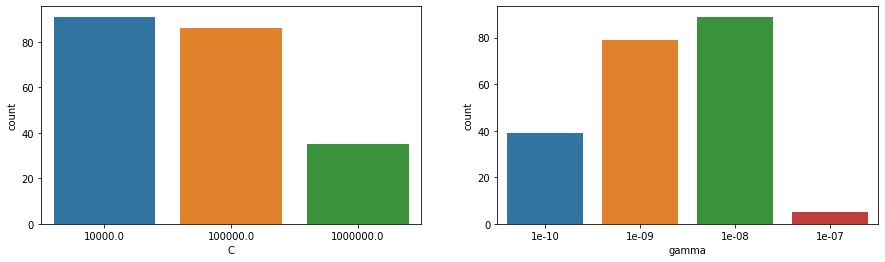

In [88]:
best_params = pd.read_csv("../work_dirs/protein/SVM/best_params_202003101043.csv")

plot_best_params(best_params)

# svm-linear

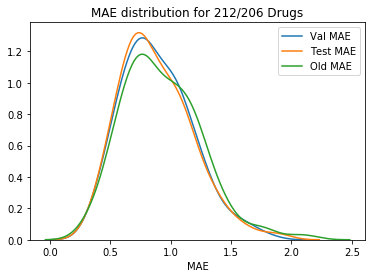

In [71]:
scores_svm = pd.read_csv("../work_dirs/SVM-linear/")
df_overlap = df[ic50[ic50['Drug Id'].isin(scores_svm['Drug Id'])]['Drug name'].unique()]

sns.distplot(scores_svm['val_mae'], hist=False, label='Val MAE')
sns.distplot(scores_svm['test_mae'], hist=False, label='Test MAE')
sns.distplot(df_overlap.iloc[0,:].astype(float), hist=False, label='Old MAE')
plt.legend()
plt.title('MAE distribution for 212/206 Drugs')
plt.xlabel("MAE")
plt.show()


In [72]:
print(scores_svm['val_mae'].mean())
print(scores_svm['test_mae'].mean())
print(df_overlap.iloc[0,:].astype(float).mean())

0.883735945719319
0.8785088509605954
0.9252397546753948


# elastic net

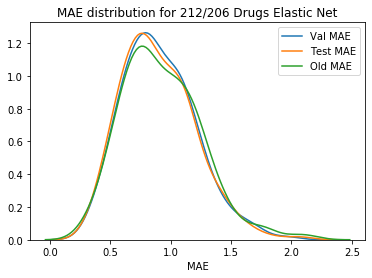

In [77]:
scores_en = pd.read_csv("../work_dirs/ElasticNet/scores_202003071957.csv")
df_overlap = df[ic50[ic50['Drug Id'].isin(scores_en['Drug Id'])]['Drug name'].unique()]

sns.distplot(scores_en['val_mae'], hist=False, label='Val MAE')
sns.distplot(scores_en['test_mae'], hist=False, label='Test MAE')
sns.distplot(df_overlap.iloc[0,:].astype(float), hist=False, label='Old MAE')
plt.legend()
plt.title('MAE distribution for 212/206 Drugs Elastic Net')
plt.xlabel("MAE")
plt.show()


In [75]:
print(scores_en['val_mae'].mean())
print(scores_en['test_mae'].mean())
print(df_overlap.iloc[0,:].astype(float).mean())

0.9050577906505395
0.8964200455237302
0.9252397546753948


# MLP

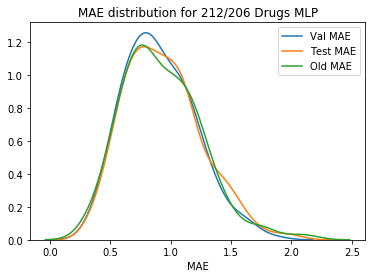

In [105]:
scores_mlp = pd.read_csv("../work_dirs/MLP/scores_202003081433.csv")
df_overlap = df[ic50[ic50['Drug Id'].isin(scores_mlp['Drug Id'])]['Drug name'].unique()]

sns.distplot(scores_mlp['val_mae'], hist=False, label='Val MAE')
sns.distplot(scores_mlp['test_mae'], hist=False, label='Test MAE')
sns.distplot(df_overlap.iloc[0,:].astype(float), hist=False, label='Old MAE')
plt.legend()
plt.title('MAE distribution for 212/206 Drugs MLP')
plt.xlabel("MAE")
plt.show()


In [106]:
print(scores_mlp['val_mae'].mean())
print(scores_mlp['test_mae'].mean())
print(df_overlap.iloc[0,:].astype(float).mean())

0.9087925424174144
0.9370798987695521
0.9252397546753948


In [96]:
print(scores_mlp['val_mae'].mean())
print(scores_mlp['test_mae'].mean())
print(df_overlap.iloc[0,:].astype(float).mean())

0.9362024803833979
0.9674311506110208
0.9252397546753948


In [89]:
print(scores_mlp['val_mae'].mean())
print(scores_mlp['test_mae'].mean())
print(df_overlap.iloc[0,:].astype(float).mean())

0.9471510040962556
0.9798054617344804
0.9252397546753948


In [107]:
best_param = pd.read_csv("../work_dirs/MLP/best_params_202003081433.csv")

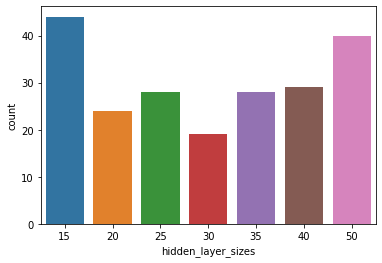

In [108]:
sns.countplot(best_param['hidden_layer_sizes'])

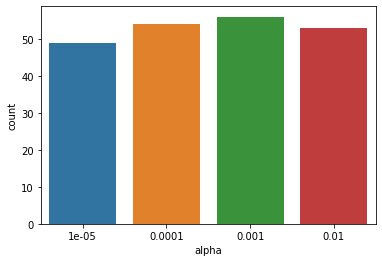

In [109]:
sns.countplot(best_param['alpha'])

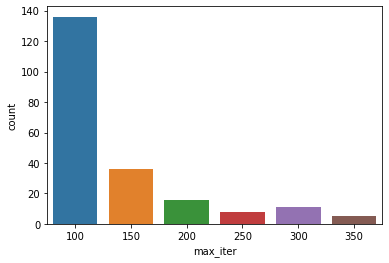

In [110]:
sns.countplot(best_param['max_iter'])

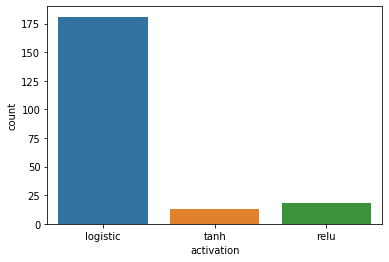

In [111]:
sns.countplot(best_param['activation'])

# compare > 950 and < 950

In [87]:
scores_en = pd.read_csv("../work_dirs/ElasticNet/scores_202003071957.csv")
df_rebecca = df[ic50[~ic50['Drug Id'].isin(scores_en['Drug Id'])]['Drug name'].unique()]

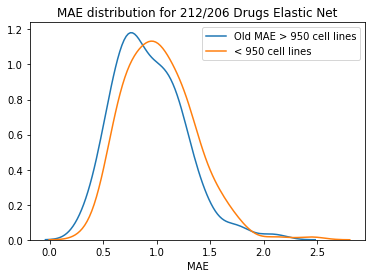

In [94]:
sns.distplot(df_overlap.iloc[0,:].astype(float), hist=False, label='Old MAE > 950 cell lines')
sns.distplot(df_rebecca.iloc[0,:].astype(float), hist=False, label='< 950 cell lines')

plt.legend()
plt.title('MAE distribution for 212/206 Drugs Elastic Net')
plt.xlabel("MAE")
plt.show()


In [80]:
print(df_rebecca.iloc[0,:].astype(float).mean())

1.0267638916198034


# RNA SVM

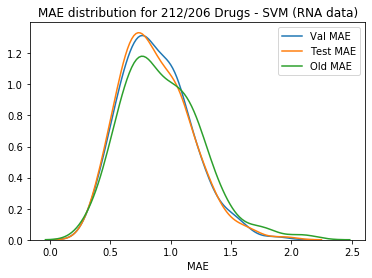

In [36]:
scores_svm_rna = pd.read_csv("../work_dirs/rna/SVM/scores_202003091512.csv")
df_overlap = df[ic50[ic50['Drug Id'].isin(scores_svm_rna['Drug Id'])]['Drug name'].unique()]

sns.distplot(scores_svm_rna['val_mae'], hist=False, label='Val MAE')
sns.distplot(scores_svm_rna['test_mae'], hist=False, label='Test MAE')
sns.distplot(df_overlap.iloc[0,:].astype(float), hist=False, label='Old MAE')
plt.legend()
plt.title('MAE distribution for 212/206 Drugs - SVM (RNA data)')
plt.xlabel("MAE")
plt.show()

In [37]:
print(scores_svm_rna['val_mae'].mean())
print(scores_svm_rna['test_mae'].mean())
print(df_overlap.iloc[0,:].astype(float).mean())


0.8733755449518213
0.8670630475195479
0.9252397546753948


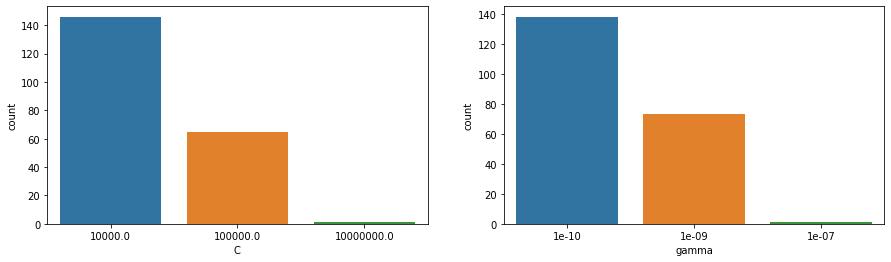

In [71]:
best_params = pd.read_csv("../work_dirs/rna/SVM/best_params_202003091512.csv")

plot_best_params(best_params)

In [83]:
rna_protein_score = pd.merge(scores_svm, scores_svm_rna, on=['Drug Id'], suffixes=['_protein', '_rna'])

Text(0.35, 2, 'correlation: 1.00')

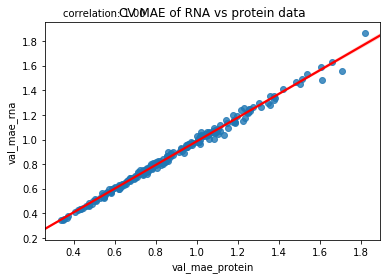

In [84]:
sns.regplot('val_mae_protein',
            'val_mae_rna',
            data=rna_protein_score,
            line_kws={'color': 'red'})
plt.title("CV MAE of RNA vs protein data")
r2_score(rna_protein_score['val_mae_protein'],
         rna_protein_score['val_mae_rna'])
plt.text(
    0.35, 2,
    f"correlation: {pearsonr(rna_protein_score['val_mae_protein'], rna_protein_score['val_mae_rna'])[0]:.2f}"
)

Text(0.35, 1.8, 'correlation: 0.99')

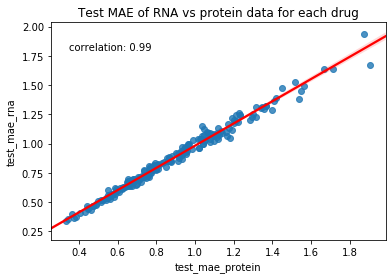

In [86]:
sns.regplot('test_mae_protein',
            'test_mae_rna',
            data=rna_protein_score,
            line_kws={'color': 'red'})
plt.title("Test MAE of RNA vs protein data for each drug")
r2_score(rna_protein_score['test_mae_protein'],
         rna_protein_score['test_mae_rna'])
plt.text(
    0.35, 1.8,
    f"correlation: {pearsonr(rna_protein_score['test_mae_protein'], rna_protein_score['test_mae_rna'])[0]:.2f}"
)

In [87]:
ttest_ind(rna_protein_score['test_mae_protein'], rna_protein_score['test_mae_rna'])

Ttest_indResult(statistic=0.40366892599122506, pvalue=0.6866606595337915)